We will work with data on motor vehicle collisions released by New York City and published on the [NYC OpenData website](https://data.cityofnewyork.us/Public-Safety/NYPD-Motor-Vehicle-Collisions/h9gi-nx95). There is data on over 1.5 million collisions dating back to 2012, with additional data continuously added.

We'll work with an extract of the full data: Crashes from the year 2018. We made several modifications to the data, including randomly sampling the data to reduce its size.

In [1]:
import pandas as pd
import numpy as np
mvc = pd.read_csv("nypd_mvc_2018.csv")

A summary of the columns and their data is below:

* `unique_key`: A unique identifier for each collision.
* `date, time`: Date and time of the collision.
* `borough`: The [borough](https://en.wikipedia.org/wiki/Boroughs_of_New_York_City), or area of New York City, where the collision occurred.
* `location`: Latitude and longitude coordinates for the collision.
* `on_street`, `cross_street`, `off_street`: Details of the street or intersection where the collision occurred.
* `pedestrians_injured`: Number of pedestrians who were injured.
* `cyclist_injured`: Number of people traveling on a bicycle who were injured.
* `motorist_injured`: Number of people traveling in a vehicle who were injured.
* `total_injured`: Total number of people injured.
* `pedestrians_killed`: Number of pedestrians who were killed.
* `cyclist_killed`: Number of people traveling on a bicycle who were killed.
* `motorist_killed`: Number of people traveling in a vehicle who were killed.
* `total_killed`: Total number of people killed.
* `vehicle_1 through vehicle_5`: Type of each vehicle involved in the accident.
* `cause_vehicle_1 through cause_vehicle_5`: Contributing factor for each vehicle in the accident.

In [2]:
# data = np.random.choice([1.0, np.nan],
#                         size=(3, 3),
#                         p=[.3, .7])

# data

In [3]:
# df = pd.DataFrame(data, columns = ["A", "B", "C"])
# print(df)

In [4]:
# print(df.isnull().sum())

In [5]:
null_counts = mvc.isnull().sum()

# calculate the percentage of null values in each column.

null_counts_pct = null_counts / mvc.shape[0] * 100

null_df = pd.DataFrame({'null_counts': null_counts, 'null_pct': null_counts_pct})
null_df

,null_counts,null_pct
unique_key,0,0.000000
date,0,0.000000
time,0,0.000000
borough,20646,35.680216
location,3885,6.714019
on_street,13961,24.127264
cross_street,29249,50.547836
off_street,44093,76.201092
pedestrians_injured,0,0.000000
cyclist_injured,0,0.000000


In [6]:
# Rotate the dataframe so that rows become columns and vice-versa
null_df = null_df.T.astype(int)
null_df

,unique_key,date,time,borough,location,on_street,cross_street,off_street,pedestrians_injured,cyclist_injured,...,vehicle_1,vehicle_2,vehicle_3,vehicle_4,vehicle_5,cause_vehicle_1,cause_vehicle_2,cause_vehicle_3,cause_vehicle_4,cause_vehicle_5
null_counts,0,0,0,20646,3885,13961,29249,44093,0,0,...,355,12262,54352,57158,57681,175,8692,54134,57111,57671
null_pct,0,0,0,35,6,24,50,76,0,0,...,0,21,93,98,99,0,15,93,98,99


About a third of the columns have no null values, with the rest ranging from less than 1% to 99%!

In [7]:
# creating a dataframe killed, containing the five columns that relate to people killed in collisions

killed_cols = [col for col in mvc.columns if 'killed' in col]
killed_cols

['pedestrians_killed', 'cyclist_killed', 'motorist_killed', 'total_killed']

In [8]:
killed = mvc[killed_cols].copy()
killed.head()

,pedestrians_killed,cyclist_killed,motorist_killed,total_killed
0,0,0,0,0.0
1,0,0,0,0.0
2,0,0,0,0.0
3,0,0,0,0.0
4,0,0,0,0.0


In [9]:
# Select the first three columns from killed and sum each row
killed_manual_sum = killed[["pedestrians_killed","cyclist_killed","motorist_killed"]].sum(axis = 1)
killed_manual_sum.head()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [10]:
# Create a boolean mask that checks whether each value in killed_manual_sum is not equal to the values in the total_killed

killed_mask = killed_manual_sum != killed["total_killed"]
killed_non_eq = killed[killed_mask]
killed_non_eq

,pedestrians_killed,cyclist_killed,motorist_killed,total_killed
3508,0,0,0,NaN
20163,0,0,0,NaN
22046,0,0,1,0.0
48719,0,0,0,NaN
55148,0,0,0,NaN
55699,0,0,0,NaN


We can categorize these into two categories:

1. Five rows where the `total_killed` is not equal to the sum of the other columns because the total value is missing.
2. One row where the `total_killed` is less than the sum of the other columns.

`Series.mask()` is useful when we want to replace certain values in a series based off a boolean mask. The syntax for the method is:

`Series.mask(bool_mask, val_to_replace)`

We update using a `single value`, but we can also update with the `matching value` from a series that has identical index labels

In [11]:
# fix the killed values

# update the values in the total_killed column with all null values with the equivalent values from killed_manual_sum series

killed['total_killed'] = killed['total_killed'].mask(killed['total_killed'].isnull(),killed_manual_sum )

# replacing any values where the manual sum and the total column aren't equal with np.nan

killed['total_killed'] = killed['total_killed'].mask(killed['total_killed']!=killed_manual_sum, np.nan )


In [12]:
# Create an injured dataframe and manually sum values

injured = mvc[[col for col in mvc.columns if 'injured' in col]].copy()
injured.head()

,pedestrians_injured,cyclist_injured,motorist_injured,total_injured
0,0,0,0,0.0
1,0,0,0,0.0
2,0,0,1,1.0
3,0,0,0,0.0
4,0,0,0,0.0


In [13]:
# manually summing the three individual injured columns

injured_manual_sum = injured.iloc[:,0:3].sum(axis = 1)
injured_manual_sum.head()

0    0
1    0
2    1
3    0
4    0
dtype: int64

Using `Series.mask()` to replace any null values from the `total_injured` column with their equivalents from the `injured_manual_sum` series.

In [14]:
injured["total_injured"] = injured["total_injured"].mask(injured["total_injured"].isnull(), injured_manual_sum )


Using `Series.mask()` to replace any numbers from `total_injured` that aren't equal to their equivalents in `injured_manual_sum` with `np.nan`

In [15]:
injured["total_injured"] = injured["total_injured"].mask(injured["total_injured"]!=injured_manual_sum, np.nan )


In [16]:
# summarize the count of null values before and after our changes:
summary = {
    'injured': [
        mvc['total_injured'].isnull().sum(),
        injured['total_injured'].isnull().sum()
    ],
    'killed': [
        mvc['total_killed'].isnull().sum(),
        killed['total_killed'].isnull().sum()
    ]
}

summary

{'injured': [1, 21], 'killed': [5, 1]}

For the `total_killed` column, the number of values has gone down from 5 to 1. For the `total_injured` column, the number of values has actually gone up — from 1 to 21.

In [17]:
# assign the values from the killed and injured dataframe to the main mvc dataframe:
mvc['total_injured'] = injured['total_injured']
mvc['total_killed'] = killed['total_killed']

We used a table of numbers to understand the number of missing values in our dataframe. A different approach we can take is to use a plot to visualize the missing values. The function below uses `seaborn.heatmap()` to represent null values as light squares and non-null values as dark squares:

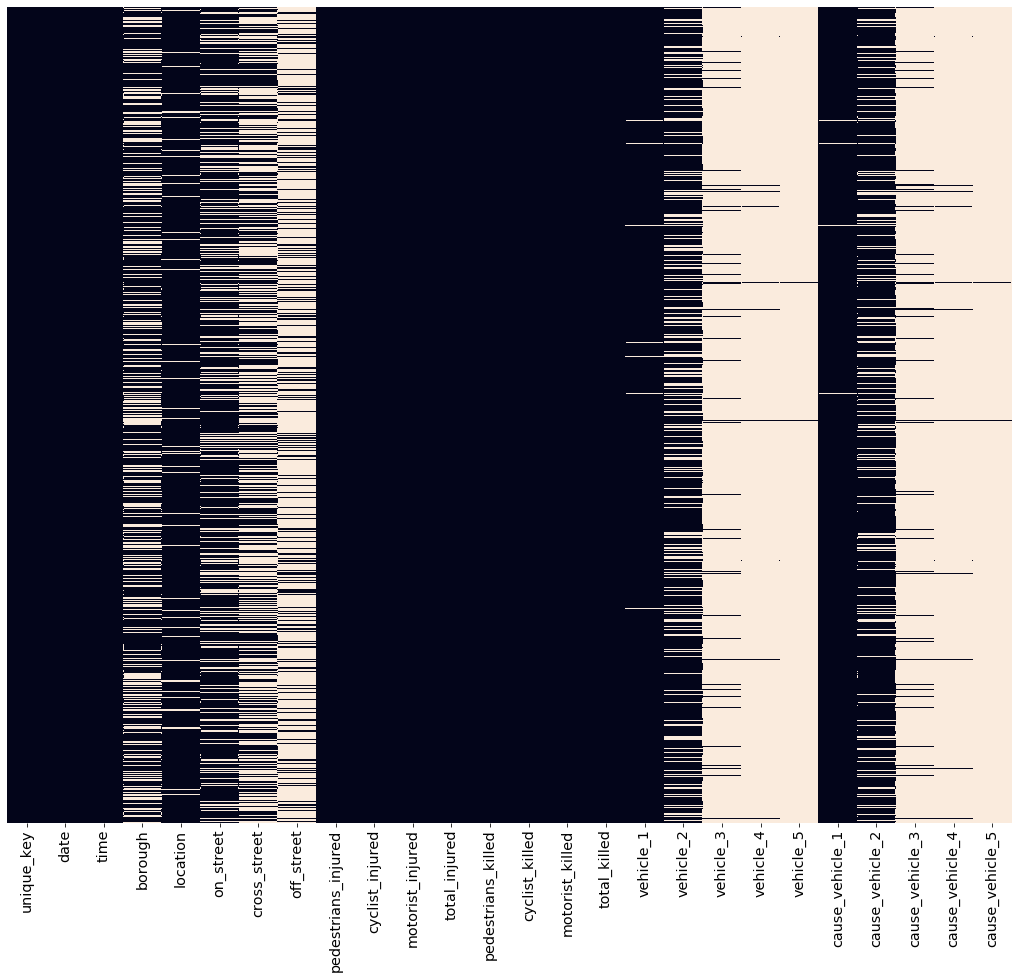

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_null_matrix(df, figsize=(18,15)):
    plt.figure(figsize = figsize)
    df_null = df.isnull()
    sns.heatmap(df_null, cbar = False, yticklabels = False )
    plt.xticks(rotation = 90, size = 'x-large')
    plt.show()
    
plot_null_matrix(mvc)


We can make some immediate interpretations about our dataframe:

* The first three columns have few to no missing values.
* The next five columns have missing values scattered throughout, with each column seeming to have its own density of missing values.
* The next eight columns are the injury and killed columns we just cleaned, and only have a few missing values.
* The last 10 columns seem to break into two groups of five, with each group of five having similar patterns of null/non-null values.

Let's examine the pattern in the last 10 columns a little more closely. We can calculate the relationship between two sets of columns, known as **correlation**. To calculate this we use the [`dataframe.corr()`method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) 

In [19]:
cols_with_missing_vals = mvc.columns[mvc.isnull().sum() > 0]
cols_with_missing_vals

Index(['borough', 'location', 'on_street', 'cross_street', 'off_street',
       'total_injured', 'total_killed', 'vehicle_1', 'vehicle_2', 'vehicle_3',
       'vehicle_4', 'vehicle_5', 'cause_vehicle_1', 'cause_vehicle_2',
       'cause_vehicle_3', 'cause_vehicle_4', 'cause_vehicle_5'],
      dtype='object')

In [20]:
missing_corr = mvc[cols_with_missing_vals].isnull().corr()
missing_corr

,borough,location,on_street,cross_street,off_street,total_injured,total_killed,vehicle_1,vehicle_2,vehicle_3,vehicle_4,vehicle_5,cause_vehicle_1,cause_vehicle_2,cause_vehicle_3,cause_vehicle_4,cause_vehicle_5
borough,1.000000,0.190105,-0.350190,0.409107,0.362189,-0.002827,0.005582,-0.018325,-0.077516,-0.061932,-0.020406,-0.010733,-0.012115,-0.058596,-0.060542,-0.020158,-0.011348
location,0.190105,1.000000,-0.073975,-0.069719,0.084579,-0.001486,0.015496,-0.010466,-0.033842,-0.000927,0.004655,-0.005797,-0.003458,-0.021373,0.000684,0.004604,-0.004841
on_street,-0.350190,-0.073975,1.000000,0.557767,-0.991030,0.006220,-0.002344,-0.001889,0.119647,0.020867,0.004172,-0.002768,0.001307,0.087374,0.017426,0.002737,-0.003107
cross_street,0.409107,-0.069719,0.557767,1.000000,-0.552763,0.002513,0.004112,-0.017018,0.043799,-0.049910,-0.021137,-0.012003,-0.009102,0.031189,-0.052159,-0.022074,-0.013455
off_street,0.362189,0.084579,-0.991030,-0.552763,1.000000,-0.004266,0.002323,0.001812,-0.121129,-0.022404,-0.004074,0.002492,-0.001738,-0.088187,-0.019120,-0.002580,0.002863
total_injured,-0.002827,-0.001486,0.006220,0.002513,-0.004266,1.000000,-0.000079,0.079840,0.025644,-0.002757,0.002118,0.001073,0.131140,0.030082,-0.002388,0.002188,0.001102
total_killed,0.005582,0.015496,-0.002344,0.004112,0.002323,-0.000079,1.000000,-0.000327,0.008017,0.001057,0.000462,0.000234,-0.000229,0.009888,0.001091,0.000477,0.000240
vehicle_1,-0.018325,-0.010466,-0.001889,-0.017018,0.001812,0.079840,-0.000327,1.000000,0.151516,0.019972,0.008732,0.004425,0.604281,0.180678,0.020624,0.009022,0.004545
vehicle_2,-0.077516,-0.033842,0.119647,0.043799,-0.121129,0.025644,0.008017,0.151516,1.000000,0.131813,0.057631,0.029208,0.106214,0.784402,0.132499,0.058050,0.029264
vehicle_3,-0.061932,-0.000927,0.020867,-0.049910,-0.022404,-0.002757,0.001057,0.019972,0.131813,1.000000,0.437214,0.221585,0.014000,0.106874,0.961316,0.448525,0.225067


Each value is between **-1** and **1**, and represents the relationship between two columns. A number close to 1 or -1  represents a strong relationship, where a number in the middle (close to 0) represents a weak relationship.

If we look closely, we can see a diagonal line of **1s** going from top left to bottom right. These values represent each columns relationship with itself, which of course is a perfect relationship. The values on the top/right of this "line of **1s** mirror the values on the bottom/left of this line: The table actually repeats every value twice!

Correlation tables can be hard to interpret. We can convert our table into a plot which will make this a lot easier.

In [21]:
# creating a function, plot_null_correlations(), which will plot correlations between null values in a dataframe.

def plot_null_correlations(df):
    cols_with_missing_vals = df.columns[df.isnull().sum() > 0]
    missing_corr = df[cols_with_missing_vals].isnull().corr()
    # create a triangular mask to avoid repeated values and make the plot easier to read
    missing_corr = missing_corr.iloc[1:,:-1]
    mask = np.triu(np.ones_like(missing_corr),k = 1)
    # plot a heatmap of the values
    plt.figure(figsize = (20,14))
    ax = sns.heatmap(missing_corr, cbar=False,cmap='RdBu',annot=True,vmin=-1, vmax=1, mask = mask)
    # format the text in the plot to make it easier to read
    for text in ax.texts:
        t = float(text.get_text())
        if -0.05 < t < 0.01:
            text.set_text('')
        else:
            text.set_text(round(t, 2))
        text.set_fontsize('x-large')
    plt.xticks(rotation=90, size='x-large')
    plt.yticks(rotation=0, size='x-large')
    plt.show()

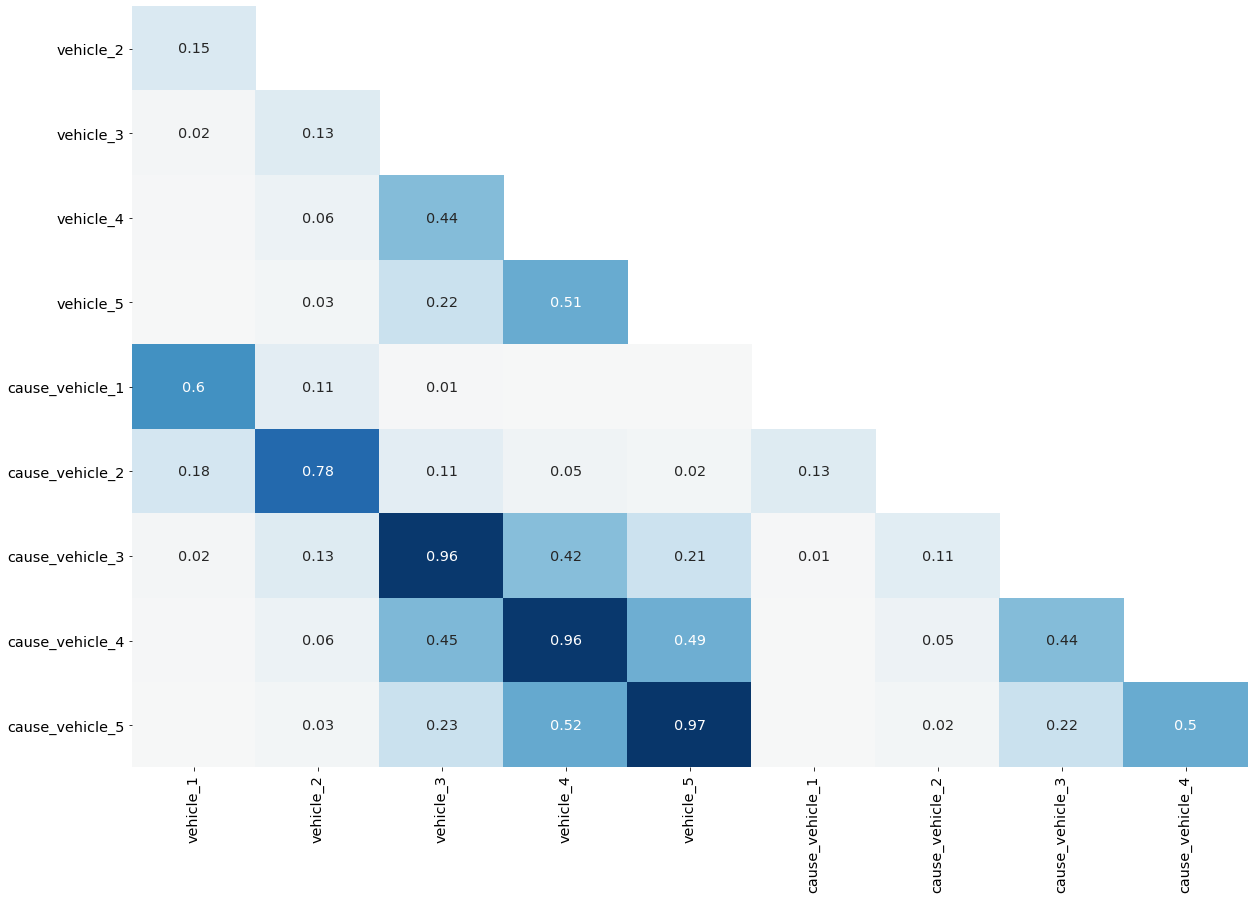

In [22]:
# list comprehension to produce a list of column names containing the substring 'vehicle'
veh_cols = [col for col in mvc.columns if 'vehicle' in col]

plot_null_correlations(mvc[veh_cols])

`numpy.triu(m, k=0)`

Upper triangle of an array.

Return a copy of a matrix with the elements below the k-th diagonal zeroed.

In [73]:
# array = np.array([[1,2,3,4],[4,5,6,7],[7,8,9,10],[10,11,12,13]])
# array

In [74]:
# np.tril(np.ones_like(array), k = 2)

Following having a higher correlation than the rest. The pairs of column names that make up these five correlations are:

1. `vehicle_1` and `cause_vehicle_1`
2. `vehicle_2` and `cause_vehicle_2`
3. `vehicle_3` and `cause_vehicle_3`
4. `vehicle_4` and `cause_vehicle_4`
5. `vehicle_5` and `cause_vehicle_5`

If we think about it, this makes sense. When a vehicle is in an accident, there is likely to be a cause, and vice-versa.

Let's explore the variations in missing values from these five pairs of columns. We'll create a dataframe that counts, for each pair:

* The number of values where the vehicle is missing when the cause is not missing.
* The number of values where the cause is missing when the vehicle is not missing.

In [25]:
col_labels = ['v_number', 'vehicle_missing', 'cause_missing']

vc_null_data = []
for i in range(1,6):
    v_col = f'vehicle_{i}'
    c_col = 'cause_vehicle_{}'.format(i)
    v_null = ((mvc[v_col].isnull()) & (mvc[c_col].notnull())).sum()
    c_null = ((mvc[v_col].notnull()) & (mvc[c_col].isnull())).sum()
    vc_null_data.append([i,v_null, c_null])
vc_null_data    

[[1, 204, 24], [2, 3793, 223], [3, 242, 24], [4, 50, 3], [5, 10, 0]]

In [26]:
vc_null_df = pd.DataFrame(vc_null_data,columns = col_labels)
vc_null_df

,v_number,vehicle_missing,cause_missing
0,1,204,24
1,2,3793,223
2,3,242,24
3,4,50,3
4,5,10,0


The analysis we did indicates that there are roughly 4,500 missing values across the 10 columns. The easiest option for handling these would be to drop the rows with missing values. This would mean losing almost 10% of the total data, which is something we ideally want to avoid.

A better option is to `impute(fill missing data)` the data, like we did earlier. Because the data in these columns is text data, we can't perform a numeric calculation to impute missing data like we did with the `injuries` and `killed` columns.

One common option when imputing is to use the most common value to fill in data. Let's look at the common values across these columns and see if we can use that to make a decision.

We've previously used the `Series.value_counts()` method to find the most common values in a single column. In this case, we want to find the most common values across multiple columns. In order to do this, we first need to convert our dataframe of multiple columns into one single column, and then we can use `Series.value_counts()` to count the items.

To convert a dataframe to a single column of values, we use the `DataFrame.stack()` method, which stacks a dataframe object into a Series object.

This series object actually has **two** `row indexes`. The first index is the original row index, and the second contains the columns that correspond to the value

In [27]:
# count the most common values for the cause set of columns.

cause_cols = [c for c in mvc.columns if "cause" in c]
cause = mvc[cause_cols]
# print(cause.head())
cause_1d = cause.stack()
print(cause_1d.head())

0  cause_vehicle_1    Following Too Closely
   cause_vehicle_2              Unspecified
1  cause_vehicle_1         Backing Unsafely
   cause_vehicle_2              Unspecified
2  cause_vehicle_1    Following Too Closely
dtype: object


We may notice that the stacked version omits null values - this is fine, as we're just interested in the most common non-null values

In [28]:
cause_counts = cause_1d.value_counts()
top10_causes = cause_counts.head(10)
print(top10_causes)

Unspecified                       57481
Driver Inattention/Distraction    17650
Following Too Closely              6567
Failure to Yield Right-of-Way      4566
Passing or Lane Usage Improper     3260
Passing Too Closely                3045
Backing Unsafely                   3001
Other Vehicular                    2523
Unsafe Lane Changing               2372
Turning Improperly                 1590
dtype: int64


The most common `non-null` value for the cause columns is `Unspecified`, which presumably indicates that the officer reporting the collision was unable to determine the cause for that vehicle.

In [29]:
# list comprehension that identifies columns starting with the substring vehicle.
import re
v_cols = [c for c in mvc.columns if re.search("^vehicle", c)]
# Alternate method : v_cols = [c for c in mvc.columns if c.startswith("vehicle")]
v_cols

['vehicle_1', 'vehicle_2', 'vehicle_3', 'vehicle_4', 'vehicle_5']

In [30]:
vehicle = mvc[v_cols]
vehicle_1d = vehicle.stack()
top10_vehicles = vehicle_1d.value_counts().head(10)
top10_vehicles

Sedan                                  33133
Station Wagon/Sport Utility Vehicle    26124
PASSENGER VEHICLE                      16026
SPORT UTILITY / STATION WAGON          12356
Taxi                                    3482
Pick-up Truck                           2373
TAXI                                    1892
Box Truck                               1659
Bike                                    1190
Bus                                     1162
dtype: int64

The top `"cause"` is an `"Unspecified"` placeholder. This is useful instead of a null value as it makes the distinction between a value that is missing because there were only a certain number of vehicles in the collision versus one that is because the contributing cause for a particular vehicle is unknown.

The `vehicles` columns don't have an equivalent, but we can still use the same technique. Here's the logic we'll need to do for each pair of vehicle/cause columns:

* For values where the vehicle is null and the cause is non-null, set the vehicle to **Unspecified**.
* For values where the cause is null and the vehicle is not-null, set the cause to **Unspecified**.

In [31]:
def summarize_missing():
    v_missing_data = []

    for v in range(1,6):
        v_col = 'vehicle_{}'.format(v)
        c_col = 'cause_vehicle_{}'.format(v)

        v_missing = (mvc[v_col].isnull() & mvc[c_col].notnull()).sum()
        c_missing = (mvc[c_col].isnull() & mvc[v_col].notnull()).sum()

        v_missing_data.append([v, v_missing, c_missing])

    col_labels = columns=["vehicle_number", "vehicle_missing", "cause_missing"]
    return pd.DataFrame(v_missing_data, columns=col_labels)

summary_before = summarize_missing()
summary_before

,vehicle_number,vehicle_missing,cause_missing
0,1,204,24
1,2,3793,223
2,3,242,24
3,4,50,3
4,5,10,0


In [32]:
for v in range(1,6):
    v_col = 'vehicle_{}'.format(v)
    c_col = 'cause_vehicle_{}'.format(v)
    
    v_missing_mask = mvc[v_col].isnull() & mvc[c_col].notnull()
    c_missing_mask = mvc[c_col].isnull() & mvc[v_col].notnull()
    mvc[v_col] = mvc[v_col].mask(v_missing_mask, 'Unspecified')
    mvc[c_col] = mvc[c_col].mask(c_missing_mask,'Unspecified')
    
summary_after = summarize_missing()
summary_after                               

,vehicle_number,vehicle_missing,cause_missing
0,1,0,0
1,2,0,0
2,3,0,0
3,4,0,0
4,5,0,0


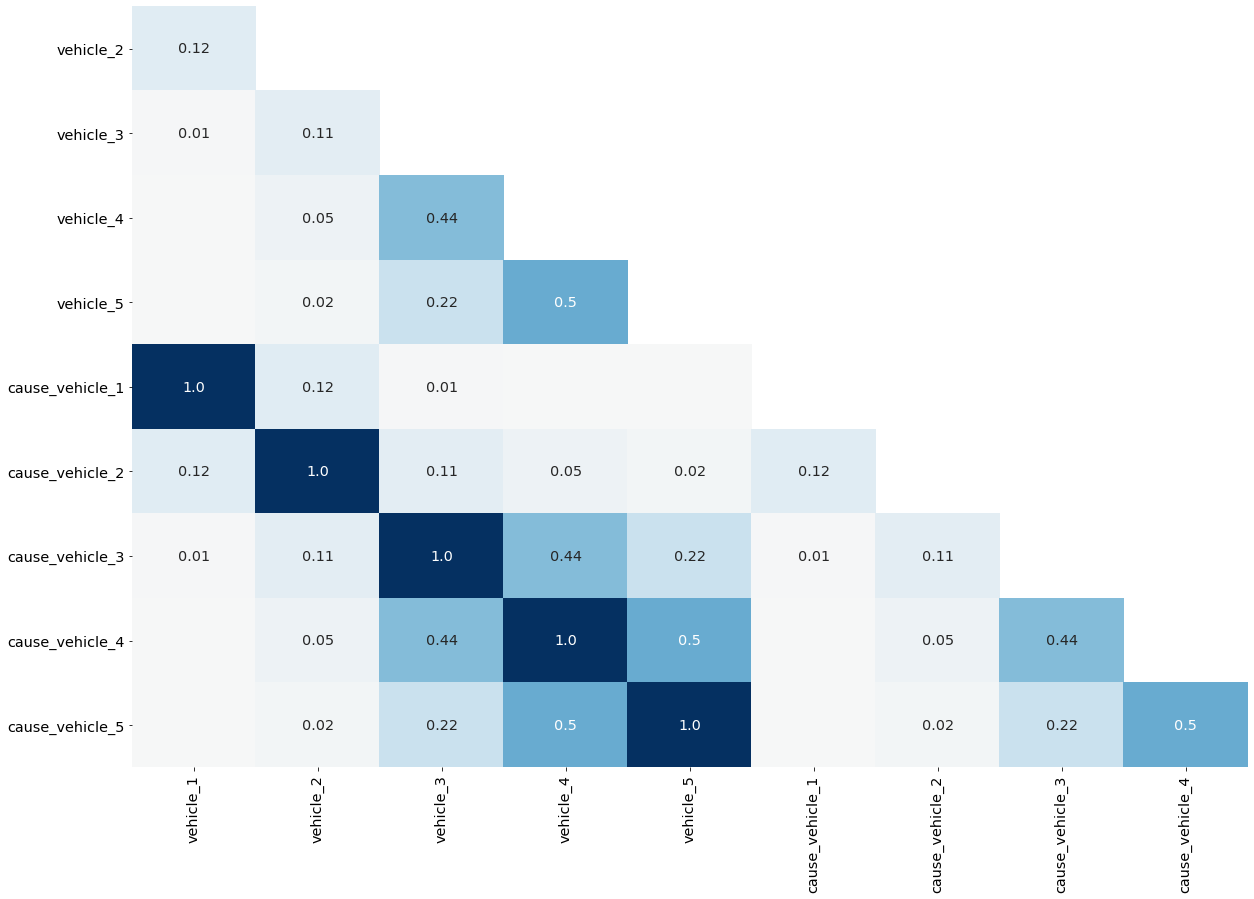

In [33]:
veh_cols = [c for c in mvc.columns if 'vehicle' in c]
plot_null_correlations(mvc[veh_cols])

We can see the perfect correlation between each pair of vehicle/cause columns represented by **1.0** in each square, which means that there is a perfect relationship between the five pairs of `vehicle`/`cause` columns.

Let's now turn our focus to the final set of columns that contain missing values — the columns that relate to the location of the accident. We'll start by looking at the first few rows to refamiliarize ourselves with the data:

In [34]:
loc_cols = ['borough', 'location', 'on_street', 'off_street', 'cross_street']
location_data = mvc[loc_cols]
location_data.head()

,borough,location,on_street,off_street,cross_street
0,MANHATTAN,"(40.742832, -74.00771)",WEST 15 STREET,NaN,10 AVENUE
1,BROOKLYN,"(40.623714, -73.99314)",16 AVENUE,NaN,62 STREET
2,NaN,"(40.591755, -73.9083)",BELT PARKWAY,NaN,NaN
3,QUEENS,"(40.73602, -73.87954)",GRAND AVENUE,NaN,VANLOON STREET
4,BRONX,"(40.884727, -73.89945)",NaN,208 WEST 238 STREET,NaN


In [35]:
print(location_data.isnull().sum())

borough         20646
location         3885
on_street       13961
off_street      44093
cross_street    29249
dtype: int64


These columns have a lot of missing values! Keep in mind that all of these five columns represent the same thing — the location of the collision. We can potentially use the non-null values to **impute** some of the null values.

To see where we might be able to do this, let's look for correlations between the missing values:

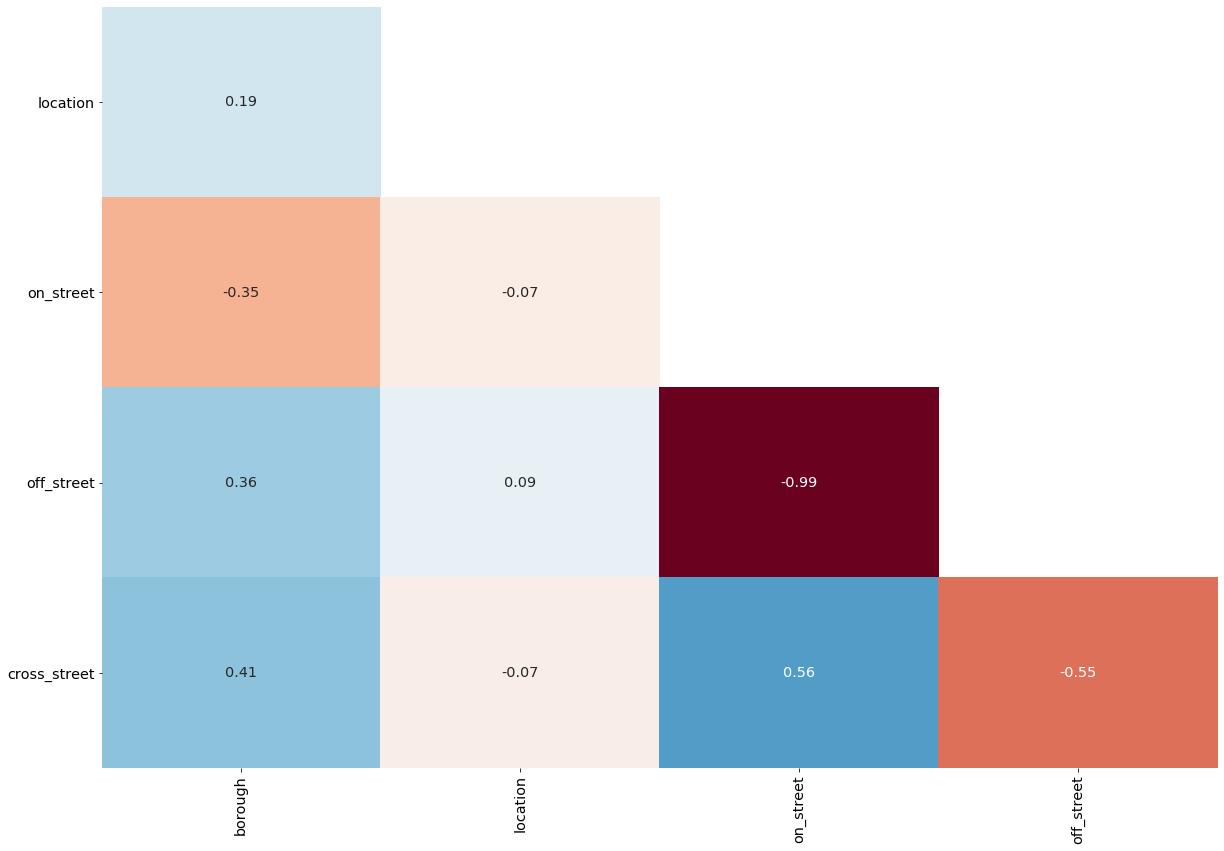

In [36]:
plot_null_correlations(location_data)

None of these columns have strong correlations except for `off_street` and `on_street` which have a near perfect negative correlation. That means for almost every row that has a null value in one column, the other has a non-null value and vice-versa.

The final way we'll look at the null values in these columns is to plot a null matrix, but we'll sort the data first. This will gather some of the null and non-null values together and make patterns more obvious:

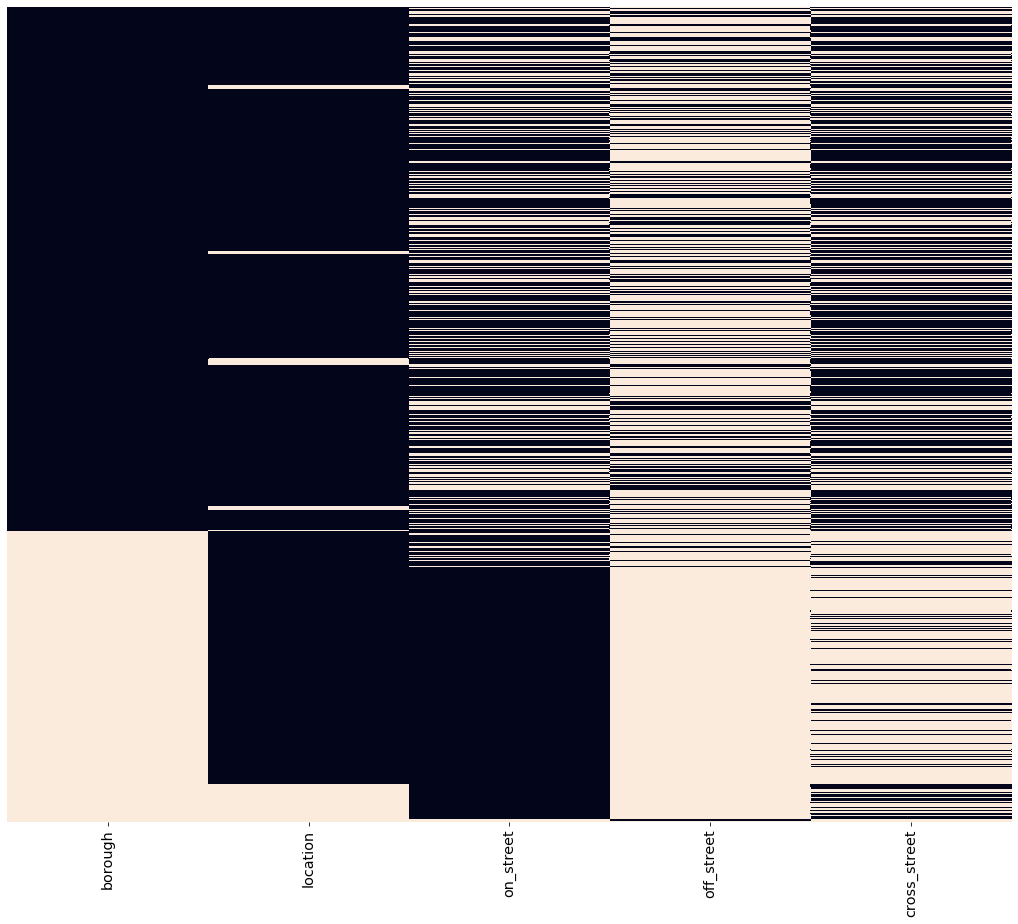

In [37]:
sorted_location_data = location_data.sort_values(loc_cols)
plot_null_matrix(sorted_location_data)

Let's make some observations about the missing values across these columns:

1. About two-thirds of rows have non-null values for `borough`, but of those values that are missing, most have non-null values for `location` and one or more of the `street` name columns.
2.  Than one-tenth of rows have missing values in the `location` column, but most of these have non-null values in one or more of the `street name` columns.
3. Most rows have a non-null value for either `on_street` or `off_street`, and some also have a value for `cross_street`.
4. Combined, this means that we will be able to **impute** a lot of the missing values by using the other columns in each row. 

To do this, we can use `geolocation APIs` that take either an **address** or **location coordinates** and return information about that **location**.

We prepared the supplemental data using the [GeoPy](https://geopy.readthedocs.io/en/latest/) package, which makes working with `Geocoding APIs` like the `Google Maps API` easier. Here's the strategy we used to prepare the supplemental data:

* For rows with `location` values but missing values in either `borough` or the `street name` columns, we used `geocoding APIs` to look up the location coordinates to find the missing data.
* For rows with values in the `street name` columns missing `borough` and/or `location` data, we used `geocoding APIs` to look up the address to find the missing data.

In [93]:
from geopy.geocoders import Nominatim

# Example 1: providing geo-coordinates to find address

geolocator = Nominatim(user_agent="tutorial")
location = geolocator.reverse("40.591755, -73.9083")
print(location.address)

Mobil, Belt Parkway, Brooklyn, Kings County, New York, 11234, United States


In [94]:
# Example 2: providing geo-coordinates to find address

location = geolocator.reverse("40.785984, -73.95718")
print(location.address)

1115, 5th Avenue, Manhattan Community Board 8, Manhattan, New York County, New York, 10128, United States


In [95]:
# Example 3: providing geo-coordinates to find address

location = geolocator.reverse("40.660114, -74.00191")
print(location.address)
print()
print((location.latitude, location.longitude))
print()
print(location.raw)

Sunrise Cash & Carry, 806, 3rd Avenue, Greenwood Heights, Brooklyn, Kings County, New York, 11232, United States

(40.66032665, -74.00205433350295)

{'place_id': 153168893, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'way', 'osm_id': 248240137, 'lat': '40.66032665', 'lon': '-74.00205433350295', 'display_name': 'Sunrise Cash & Carry, 806, 3rd Avenue, Greenwood Heights, Brooklyn, Kings County, New York, 11232, United States', 'address': {'shop': 'Sunrise Cash & Carry', 'house_number': '806', 'road': '3rd Avenue', 'neighbourhood': 'Greenwood Heights', 'suburb': 'Brooklyn', 'city_district': 'Kings County', 'city': 'New York', 'state': 'New York', 'postcode': '11232', 'country': 'United States', 'country_code': 'us'}, 'boundingbox': ['40.6602246', '40.6604287', '-74.0022067', '-74.001902']}


In [96]:
# Example 4: providing address to find coordinates and other details
location = geolocator.geocode("GRAND CENTRAL PARKWAY")
print(location.address)
print()
print((location.latitude, location.longitude))
print()
print(location.raw)

Grand Central Parkway, Queens, Queens County, New York, 11102, United States

(40.7729015, -73.9208689)

{'place_id': 178182152, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'way', 'osm_id': 374433288, 'boundingbox': ['40.7726524', '40.7729015', '-73.9208689', '-73.9204602'], 'lat': '40.7729015', 'lon': '-73.9208689', 'display_name': 'Grand Central Parkway, Queens, Queens County, New York, 11102, United States', 'class': 'highway', 'type': 'motorway', 'importance': 0.6930129819421711}


In [38]:
sup_data = pd.read_csv('supplemental_data.csv')
sup_data.head()

,unique_key,location,on_street,off_street,borough
0,3869058,NaN,NaN,NaN,NaN
1,3847947,NaN,NaN,NaN,NaN
2,3914294,NaN,BELT PARKWAY,NaN,BROOKLYN
3,3915069,NaN,NaN,NaN,NaN
4,3923123,NaN,NaN,NaN,NaN


The supplemental data has five columns from our original data set — the `unique_key` that identifies each collision, and `four` of the `five` location columns. The `cross_street` column is not included because the **geocoding APIs** we used don't include data on the nearest cross street to any single location.

Let's take a look at a null matrix for the supplemental data:

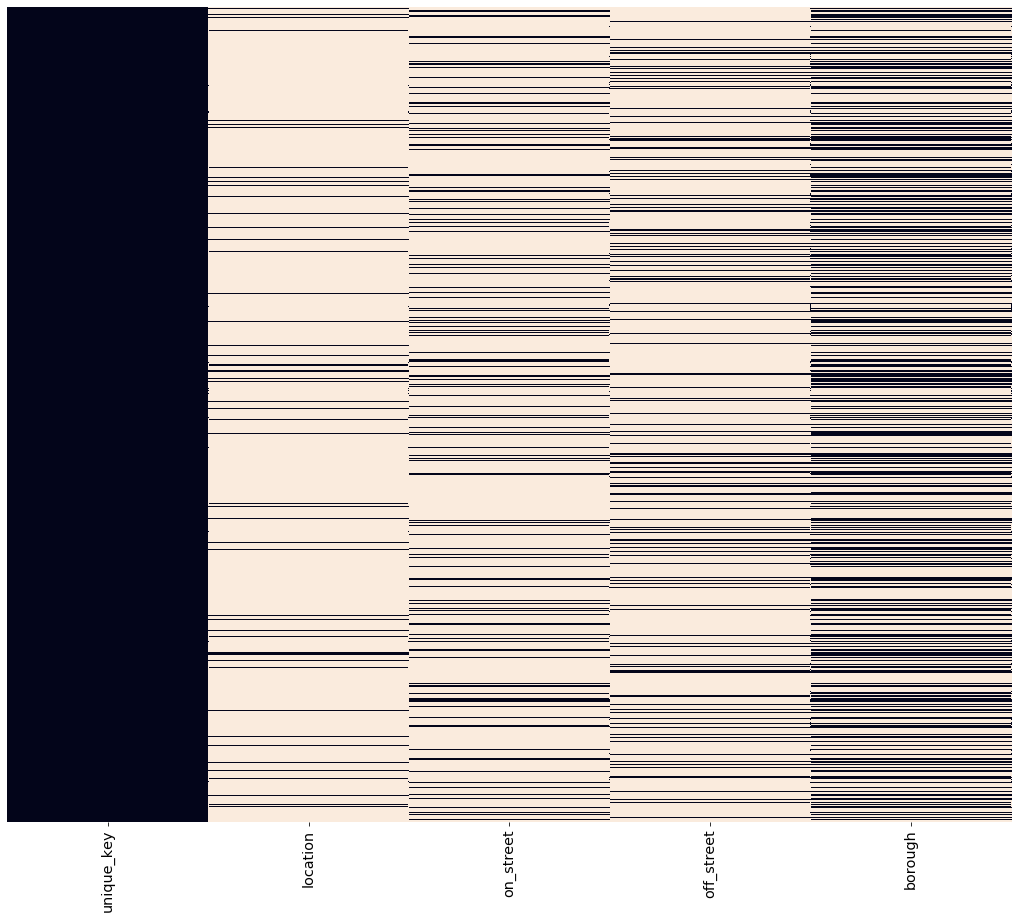

In [39]:
plot_null_matrix(sup_data)


Apart from the `unique_key` column, we'll notice that there are a lot more missing values than our main data set. This makes sense, as we didn't prepare supplemental data where the original data set had non-null values.

If the `unique_key` column in both the original and supplemental data has the same values in the same order, we'll be able to use `Series.mask()` to add our supplemental data to our original data. We can check this using the `Series.equals()` method:

In [40]:
mvc_keys = mvc['unique_key']
sup_keys = sup_data['unique_key']

is_equal = mvc_keys.equals(sup_keys)
print(is_equal)

True


In [41]:
location_cols = ['location', 'on_street', 'off_street', 'borough']
null_before = mvc[location_cols].isnull().sum()
null_before

location       3885
on_street     13961
off_street    44093
borough       20646
dtype: int64

In [42]:
for col in location_cols:
    mvc[col] = mvc[col].mask(mvc[col].isnull(), sup_data[col])

null_after = mvc[location_cols].isnull().sum()
null_after

location         77
on_street     13734
off_street    36131
borough         232
dtype: int64